Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
DataFrame<-airbnb[c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(DataFrame)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:

df_madrid<- DataFrame[DataFrame$City=="Madrid" & DataFrame$Room.Type=="Entire home/apt" & DataFrame$Neighbourhood !="",]
df_madrid$City<-NULL
df_madrid$Room.Type<-NULL

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [4]:
df_madrid$Square.Meters<-df_madrid$Square.Feet*0.092903
df_madrid$Square.Feet<-NULL

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
is_na <- sum(is.na(df_madrid$Square.Meters))
not_na<- sum(!is.na(df_madrid$Square.Meters))
total<- sum(is.na(df_madrid$Square.Meters))+sum(!is.na(df_madrid$Square.Meters))
porcentaje<-(100*is_na)/total

cat(" El porcentaje Total de Apartamentos con NA alcanza el ",round(porcentaje,2),"%")

 El porcentaje Total de Apartamentos con NA alcanza el  93.8 %

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:

porcentaje_cero<- 100*table(df_madrid$Square.Meters==0)/total
cat ("El porcentaje de Apartamentos que tienen 0 metros cuadrados es:\n ", round(porcentaje_cero[2],2) , "%")

El porcentaje de Apartamentos que tienen 0 metros cuadrados es:
  2.29 %

Reemplazar todos los 0m^2 por NA 

In [7]:

#Convertir en NA todos los 0m2 de la columna metros cuadrados
df_madrid$Square.Meters[df_madrid$Square.Meters=='0' & !is.na(df_madrid$Square.Meters)] <- NA
print(paste('El nº total de cero m2 es: ', sum(df_madrid$Square.Meters=='0' & !is.na(df_madrid$Square.Meters))))
m2Na <-sum(is.na(df_madrid$Square.Meters))
print(paste('El nuevo nº total de NAs', m2Na))
df_madrid

[1] "El nº total de cero m2 es:  0"
[1] "El nuevo nº total de NAs 5382"


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
4,Embajadores,2,1,1,2,50,1,20,93,40.41126,-3.697305,NA
5,Embajadores,5,1,2,4,95,4,0,97,40.41256,-3.701155,NA
6,La Latina,4,1,1,2,69,2,18,91,40.40791,-3.705095,NA
9,Embajadores,4,1,1,2,57,2,8,98,40.41162,-3.703281,NA
10,La Latina,2,1,1,1,59,1,0,95,40.40734,-3.707019,NA
15,La Latina,14,2,3,14,120,2,18,92,40.40908,-3.704744,NA
21,La Latina,2,1,1,1,89,1,10,98,40.41007,-3.710624,NA
22,Palacio,5,3,3,3,192,2,12,80,40.42017,-3.712629,NA
23,La Latina,4,1,1,1,100,2,12,NA,40.40990,-3.710948,NA


Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"Removed 5382 rows containing non-finite values (`stat_bin()`)."


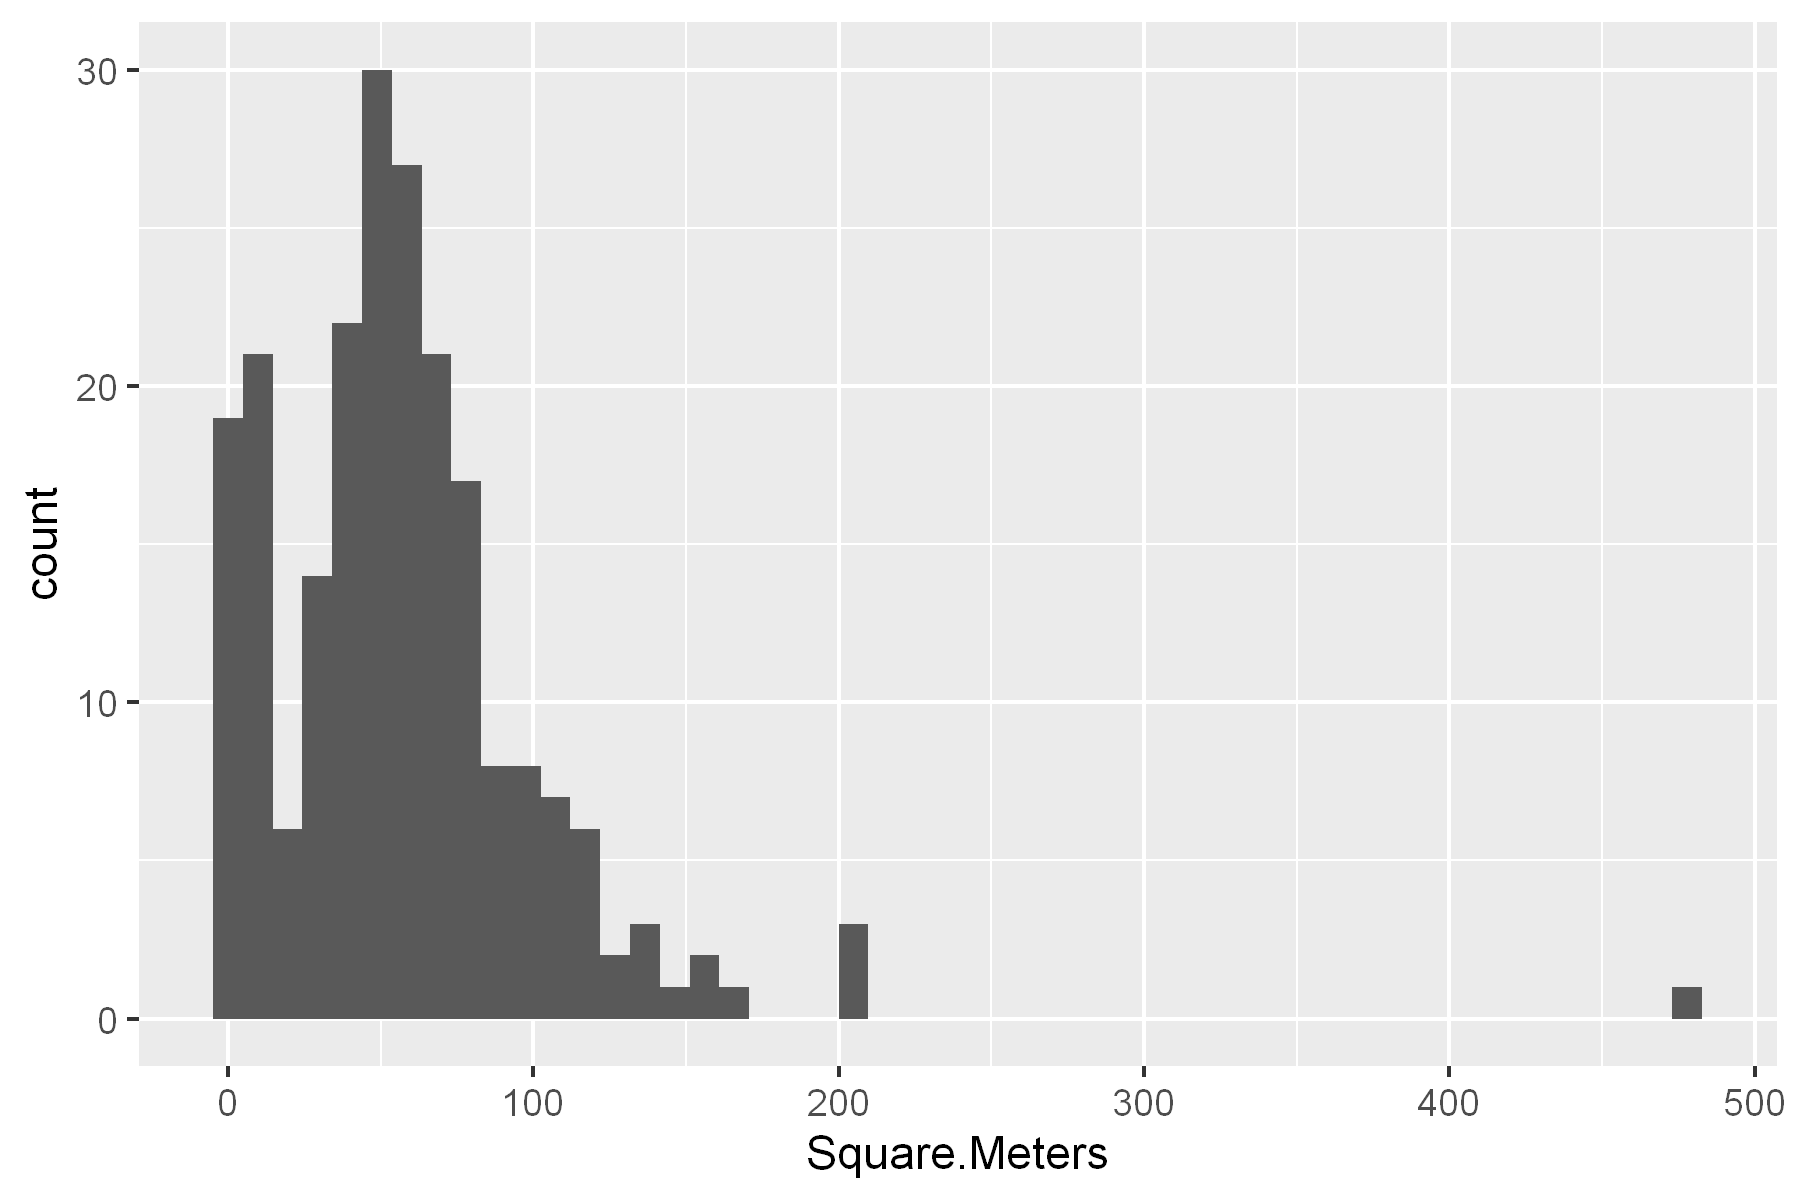

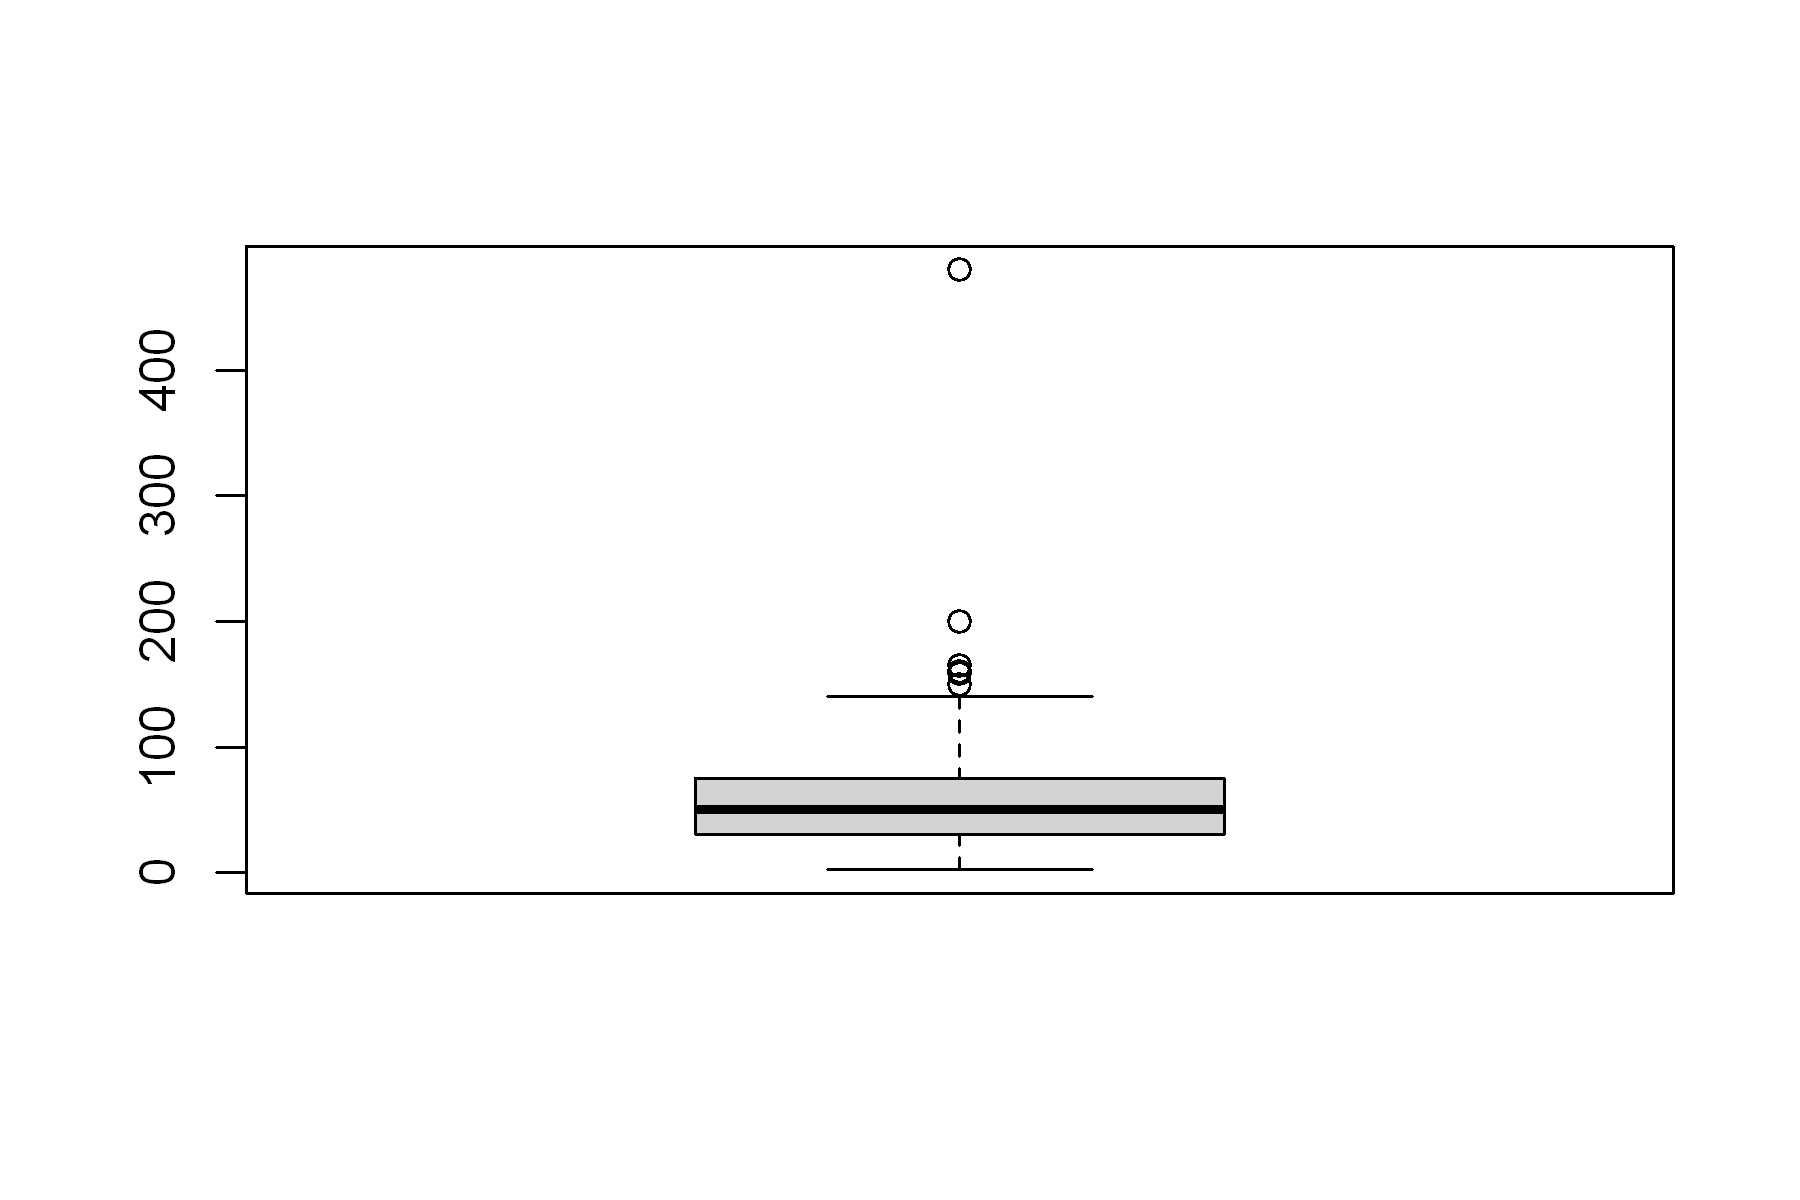

In [8]:
library(ggplot2)
ggplot(df_madrid,aes(x=Square.Meters))+geom_histogram(bins = 50)
boxplot(df_madrid$Square.Meters)



Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [9]:
library(dplyr) 

df_madrid_N<-df_madrid %>%
    group_by(Neighbourhood)

df_madrid_N <- aggregate(Square.Meters ~ Neighbourhood, data = df_madrid, mean)
dim(df_madrid_N)

df_madrid_N_d<-distinct(df_madrid_N, Neighbourhood)
df_madrid_N_d[with(df_madrid_N_d, order(Neighbourhood)), ]

df_madrid_d<-distinct(df_madrid, Neighbourhood)
df_madrid_d[with(df_madrid_d, order(Neighbourhood)), ]


df_madrid__sinNA<-df_madrid %>%  
    filter ( Neighbourhood %in% df_madrid_N$Neighbourhood)
df_madrid<-df_madrid__sinNA

Warning message:
"package 'dplyr' was built under R version 4.2.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 43  2

[1] "Acacias"          "Adelfas"          "Almagro"          "Almenara"        
 [5] "Aluche"           "Arapiles"         "Argüelles"        "Barajas"         
 [9] "Carabanchel"      "Castellana"       "Castilla"         "Centro"          
[13] "Chamberí"         "Ciudad Jardin"    "Ciudad Lineal"    "Cortes"          
[17] "Cuatro Caminos"   "Delicias"         "El Tréntaiseis"   "El Viso"         
[21] "Embajadores"      "Estrella"         "Fuente del Berro" "Goya"            
[25] "Hortaleza"        "Jerónimos"        "Justicia"         "La Latina"       
[29] "Lista"            "Malasaña"         "Moratalaz"        "Pacifico"        
[33] "Palacio"          "Palos do Moguer"  "Recoletos"        "Retiro"          
[37] "Rios Rosas"       "San Blas"         "Sol"              "Trafalgar"       
[41] "Usera"            "Vicálvaro"        "Villaverde"

[1] "Acacias"             "Adelfas"             "Almagro"            
 [4] "Almenara"            "Aluche"              "Arapiles"           
 [7] "Arganzuela"          "Argüelles"           "Atocha"             
[10] "Barajas"             "Bellas Vistas"       "Berruguete"         
[13] "Carabanchel"         "Castellana"          "Castilla"           
[16] "Castillejos"         "Centro"              "Chamberí"           
[19] "Ciudad Jardin"       "Ciudad Lineal"       "Cortes"             
[22] "Cuatro Caminos"      "Delicias"            "El Tréntaiseis"     
[25] "El Viso"             "Embajadores"         "Estrella"           
[28] "Fuencarral-el Pardo" "Fuencarral-El Pardo" "Fuente del Berro"   
[31] "Gaztambide"          "Goya"                "Guindalera"         
[34] "Hispanoamérica"      "Hortaleza"           "Ibiza"              
[37] "Imperial"            "Jerónimos"           "Justicia"           
[40] "La Chopera"          "La Latina"           "Legazpi"            
[43] "Lista"               "Malasaña"            "Moncloa"            
[46] "Moratalaz"           "Nueva España"        "Pacifico"           
[49] "Palacio"             "Palos do Moguer"     "Prosperidad"        
[52] "Puente de Vallecas"  "Recoletos"           "Retiro"             
[55] "Rios Rosas"          "San Blas"            "Sol"                
[58] "Tetuán"              "Trafalgar"           "Usera"              
[61] "Valdeacederas"       "Vallehermosa"        "Vicálvaro"          
[64] "Villa de Vallecas"   "Villaverde"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message:
"package 'reshape2' was built under R version 4.2.2"


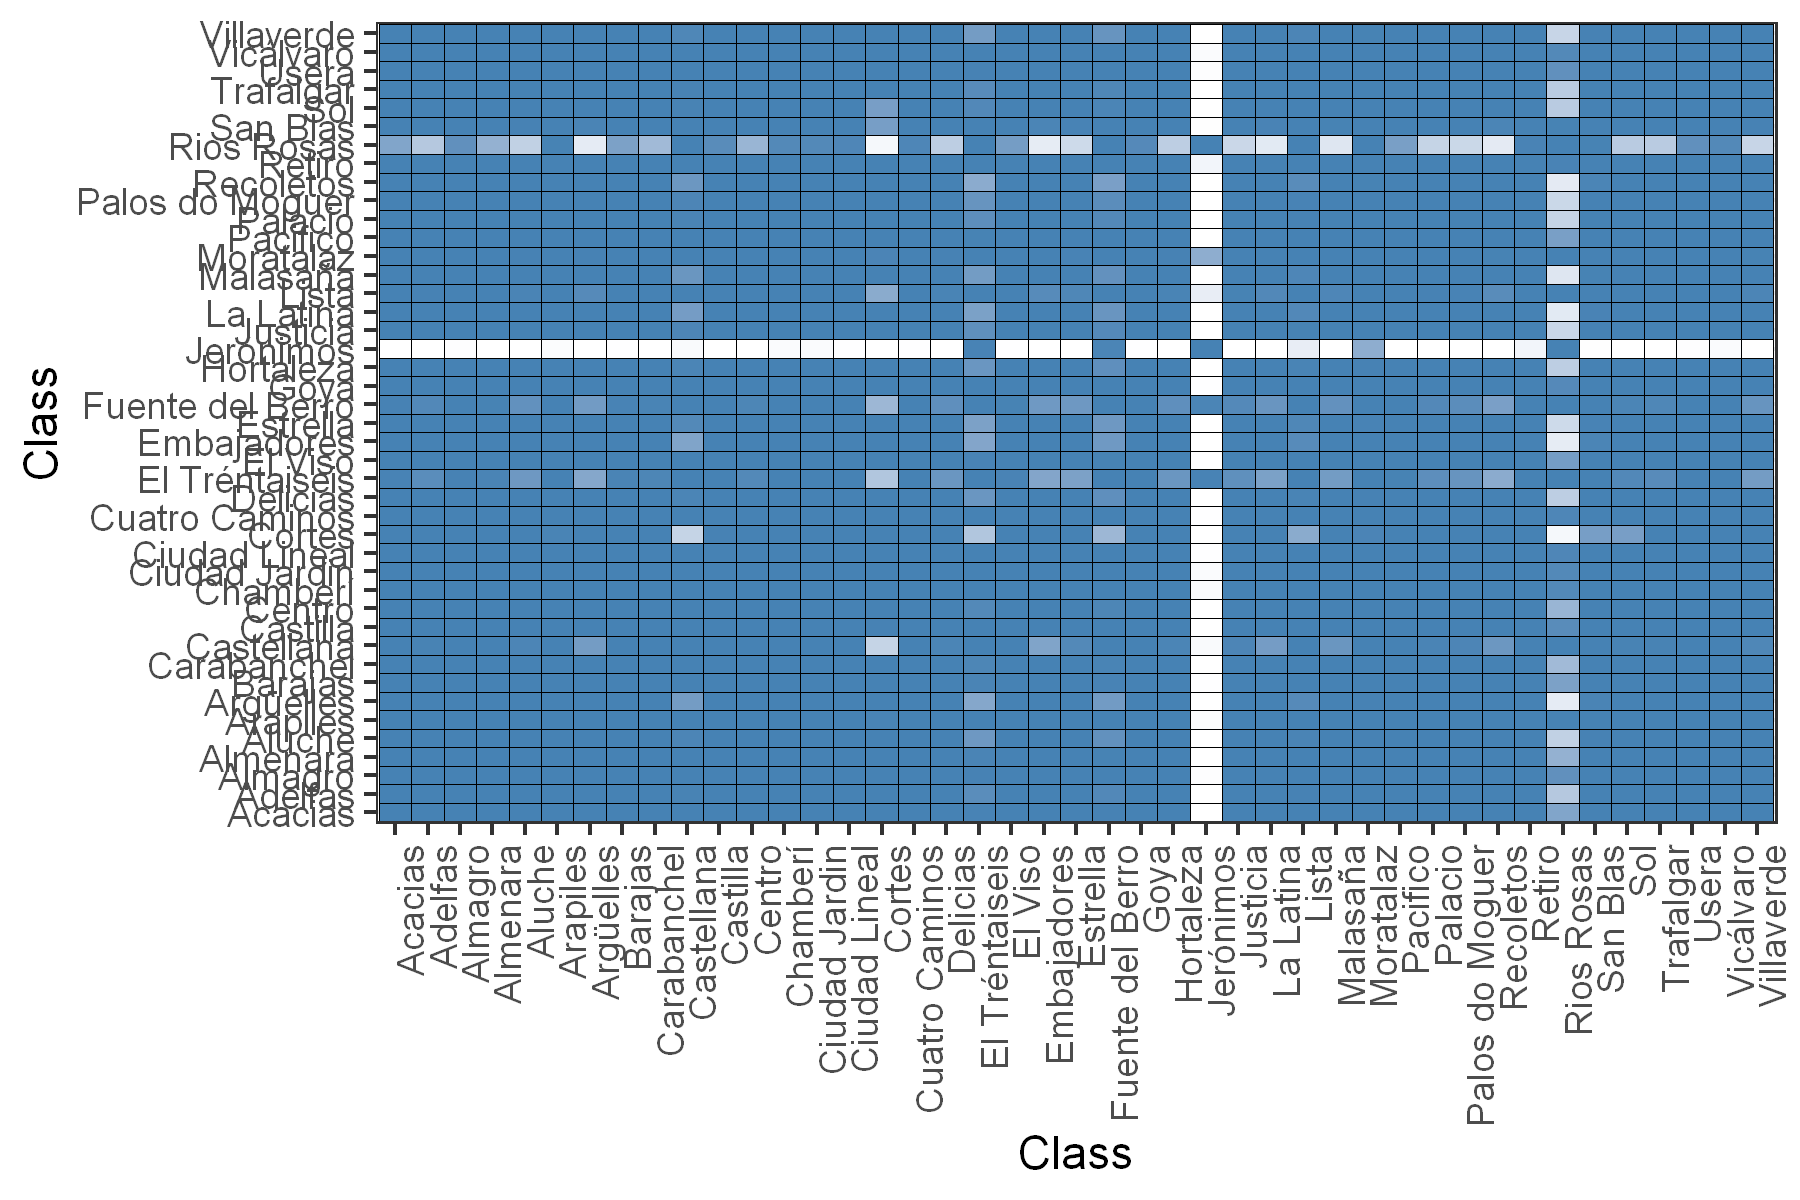

In [10]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

In [11]:
df_madrid.distancia <- as.dist(1 - abs(resm)) #distancia, resm de la matriz Tukey
df_madrid.arbol <- hclust(df_madrid.distancia, method="complete")
df_madrid.dend <- as.dendrogram(df_madrid.arbol)

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


Installing package into 'C:/Users/evang/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'dendextend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\TEMP\Rtmp6fCvj5\downloaded_packages


Warning message:
"package 'dendextend' was built under R version 4.2.2"

---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




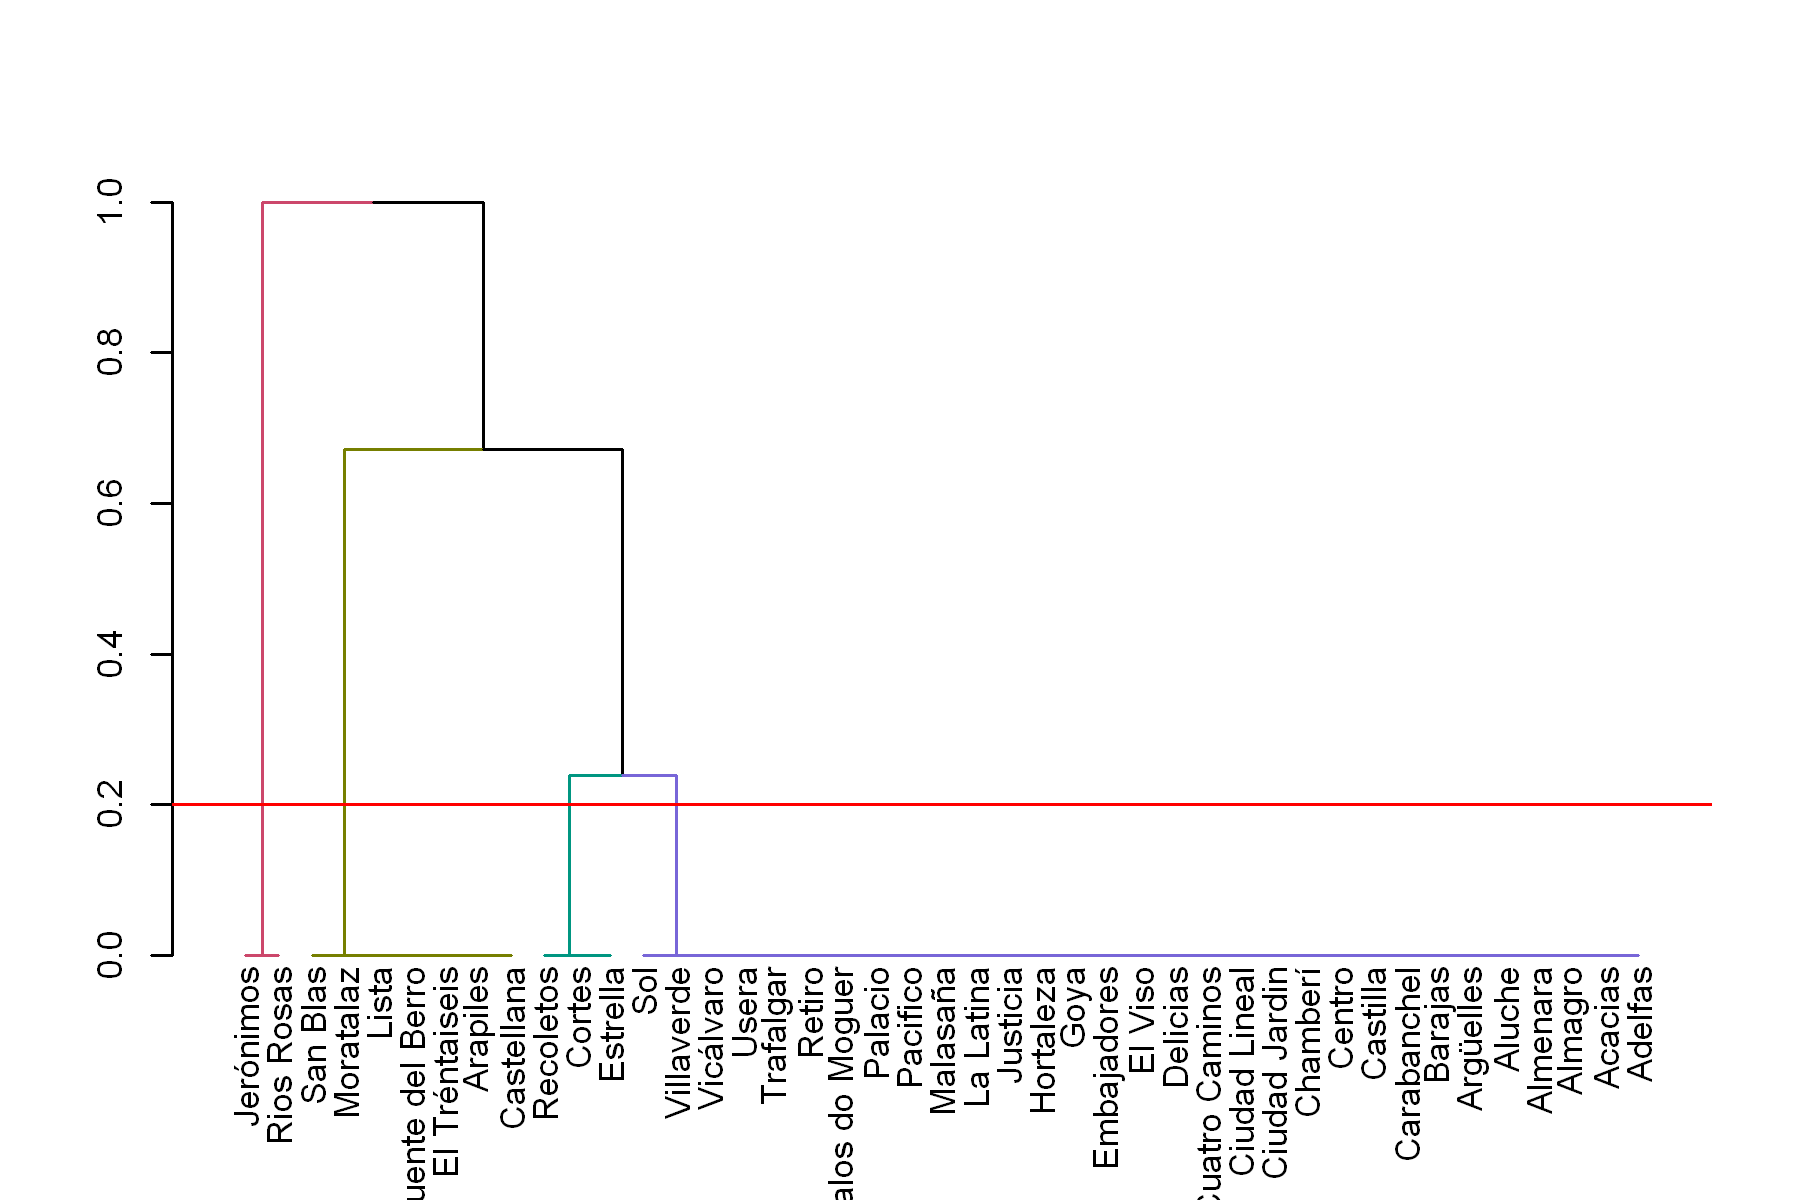

In [12]:
install.packages('dendextend')


library(dendextend)
d <- as.dist(1 - resm)
#str(d)
hc <- hclust(d, method='complete')
hcd <- as.dendrogram(hc)
par(cex=0.7)

plot(color_branches(hcd,h=0.2))
abline(h=0.2,col="red")

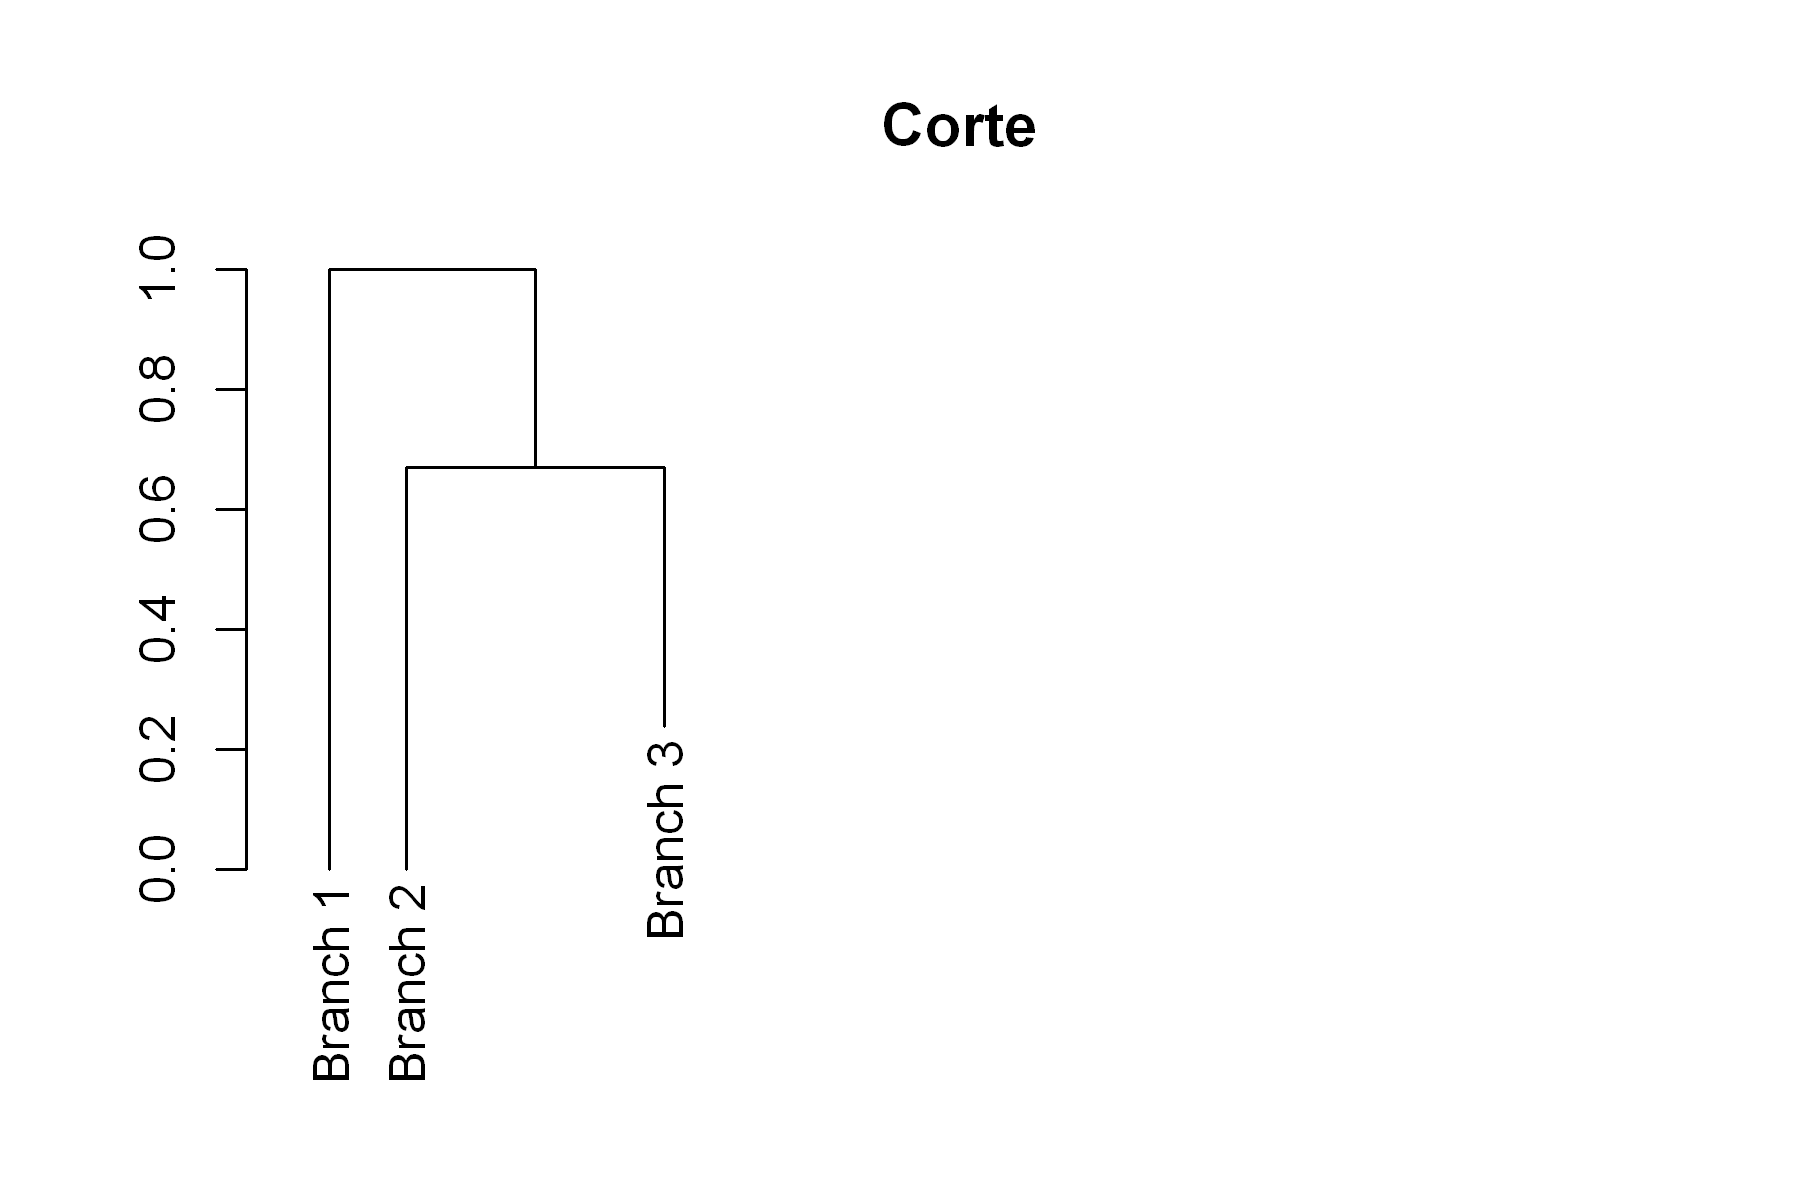

In [13]:
# 0.3
plot(cut(hcd, h = 0.3)$upper, main = "Corte", cex=1)
# 3 clusters

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [14]:
clusters<- cutree(df_madrid.dend, k=3)
print("Aparecen 3 clusters, que son: ")

c1 <-names(clusters[clusters==1])
cat('\ncluster1 -> \n', c1)
c2 <-names(clusters[clusters==2])
cat('\ncluster2 ->\n', c2)
c3 <-names(clusters[clusters==3])
cat('\ncluster3 ->\n', c3)



[1] "Aparecen 3 clusters, que son: "

cluster1 -> 
 Acacias Adelfas Almagro Almenara Aluche Argüelles Barajas Carabanchel Castilla Centro Chamberí Ciudad Jardin Ciudad Lineal Cortes Cuatro Caminos Delicias El Viso Embajadores Estrella Goya Hortaleza Justicia La Latina Malasaña Pacifico Palacio Palos do Moguer Recoletos Retiro Sol Trafalgar Usera Vicálvaro Villaverde
cluster2 ->
 Arapiles Castellana El Tréntaiseis Fuente del Berro Lista Moratalaz San Blas
cluster3 ->
 Jerónimos Rios Rosas

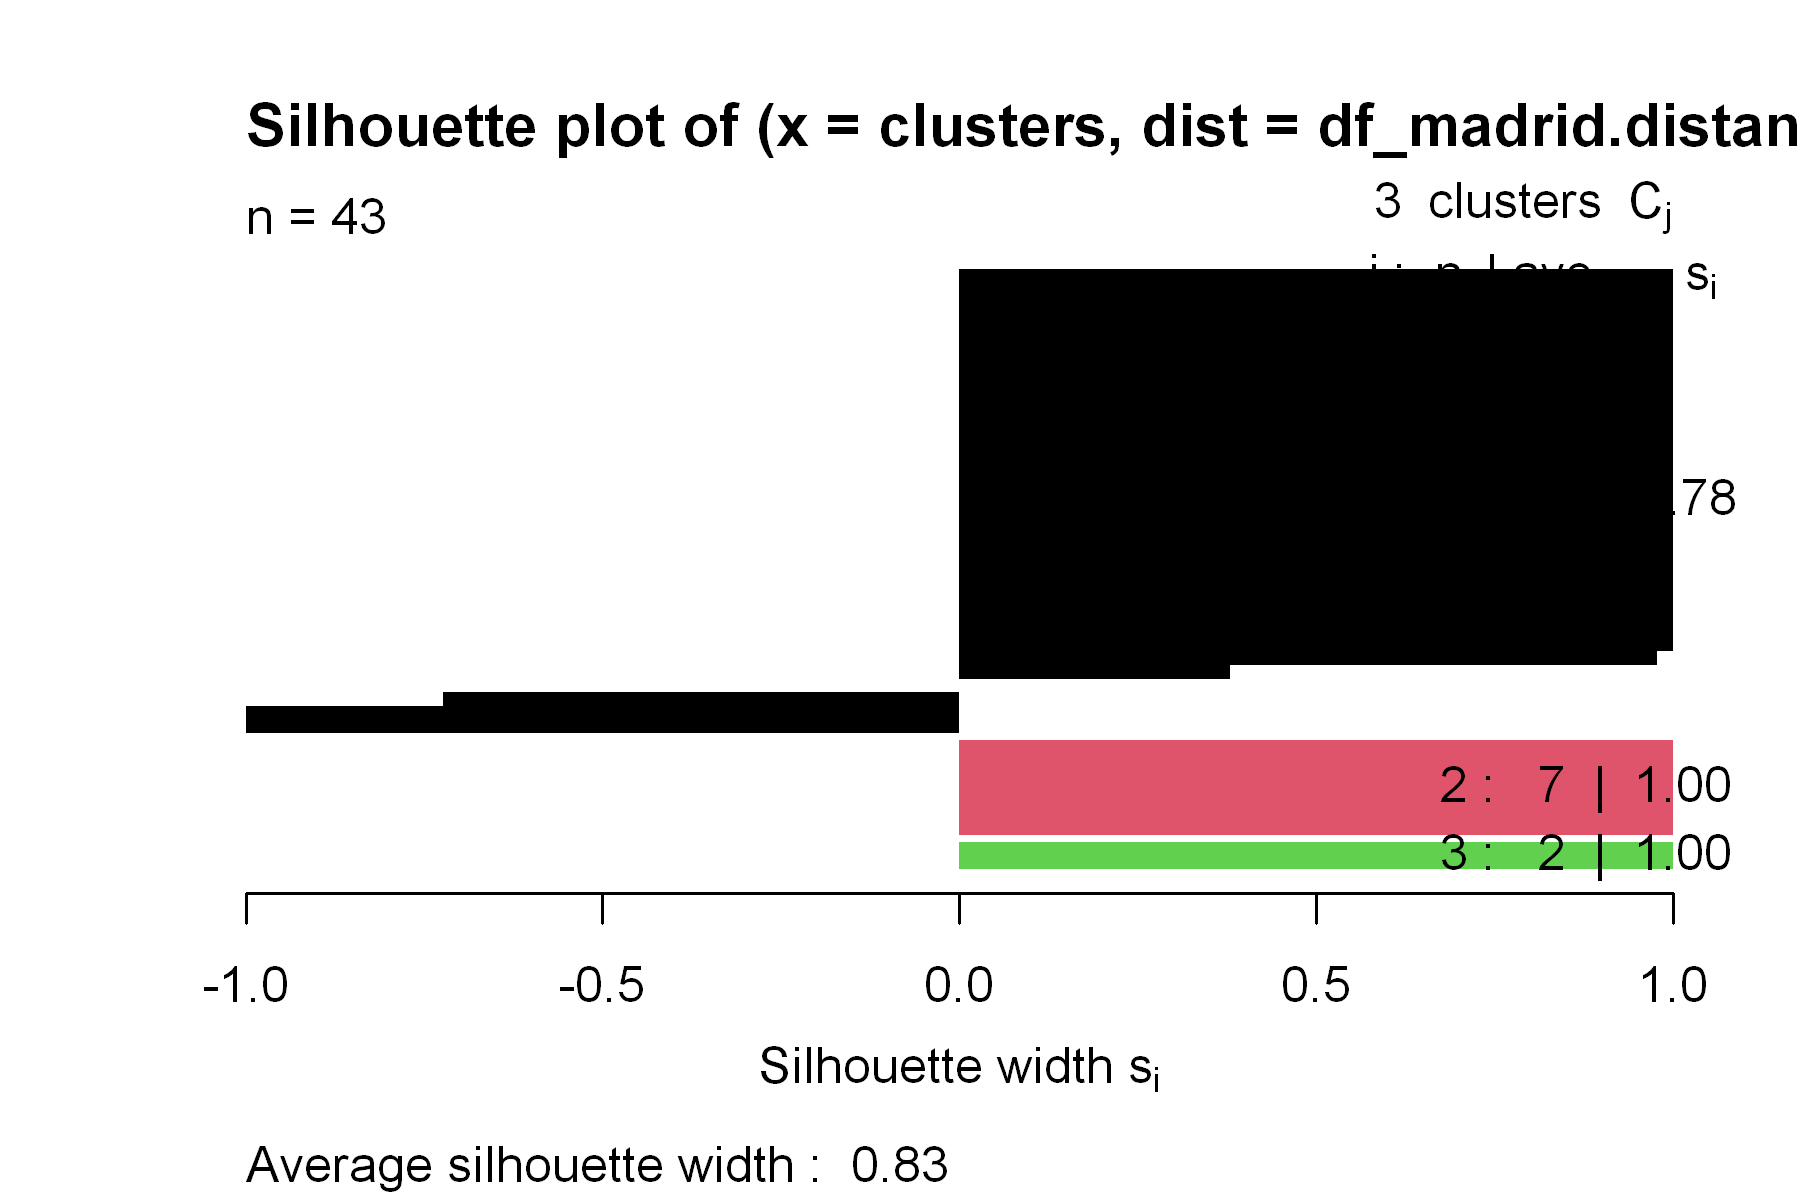

In [15]:
library(cluster)

ss<-silhouette(clusters, df_madrid.distancia)
plot(ss,col=1:max(clusters),border=NA)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [16]:
neighb_id  <- as.factor(cutree(df_madrid.dend, k=3))
df_madrid_cl <- data.frame(names(neighb_id), neighb_id)
colnames(df_madrid_cl) <- c('Neighbourhood','neighb_id')

df_madrid_cl

,Neighbourhood,neighb_id
,<chr>,<fct>
Acacias,Acacias,1
Adelfas,Adelfas,1
Almagro,Almagro,1
Almenara,Almenara,1
Aluche,Aluche,1
Arapiles,Arapiles,2
Argüelles,Argüelles,1
Barajas,Barajas,1
Carabanchel,Carabanchel,1


In [17]:
#unimos la columna neighb_id al df_madrid

df_madrid <- merge(df_madrid, df_madrid_cl, by="Neighbourhood", all=TRUE)


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [18]:
set.seed(12)

idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
madrid.train=df_madrid[idx,]
madrid.test=df_madrid[-idx,]



In [19]:
#creo el modelo incluyendo solo las variables que influyen en los metros cuadrados

model<-lm(Square.Meters~
           Bathrooms+Bedrooms+Price+Accommodates+Beds+Price+Review.Scores.Rating+neighb_id, data = madrid.train)
summary(model)


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Price + Accommodates + 
    Beds + Price + Review.Scores.Rating + neighb_id, data = madrid.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-124.912  -14.389    3.039   18.884  137.199 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -53.04211   26.21953  -2.023  0.04498 *  
Bathrooms              7.51704    7.42490   1.012  0.31309    
Bedrooms               4.31869    4.72492   0.914  0.36228    
Price                  0.12011    0.05167   2.325  0.02153 *  
Accommodates           2.71522    2.72283   0.997  0.32039    
Beds                   4.73748    2.67549   1.771  0.07879 .  
Review.Scores.Rating   0.61447    0.27217   2.258  0.02552 *  
neighb_id2            39.96252   13.69715   2.918  0.00411 ** 
neighb_id3           127.60675   22.74869   5.609 1.05e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3

In [20]:
confint(model)
madrid.train$pred<-predict(model,madrid.train)
madrid.test$pred<-predict(model,madrid.test)



,2.5 %,97.5 %
(Intercept),-104.87954024,-1.204687
Bathrooms,-7.16238636,22.196461
Bedrooms,-5.02272786,13.660109
Price,0.01796133,0.222253
Accommodates,-2.66796916,8.098400
Beds,-0.55210302,10.027061
Review.Scores.Rating,0.07636676,1.152573
neighb_id2,12.88252572,67.042519
neighb_id3,82.63136345,172.582138


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

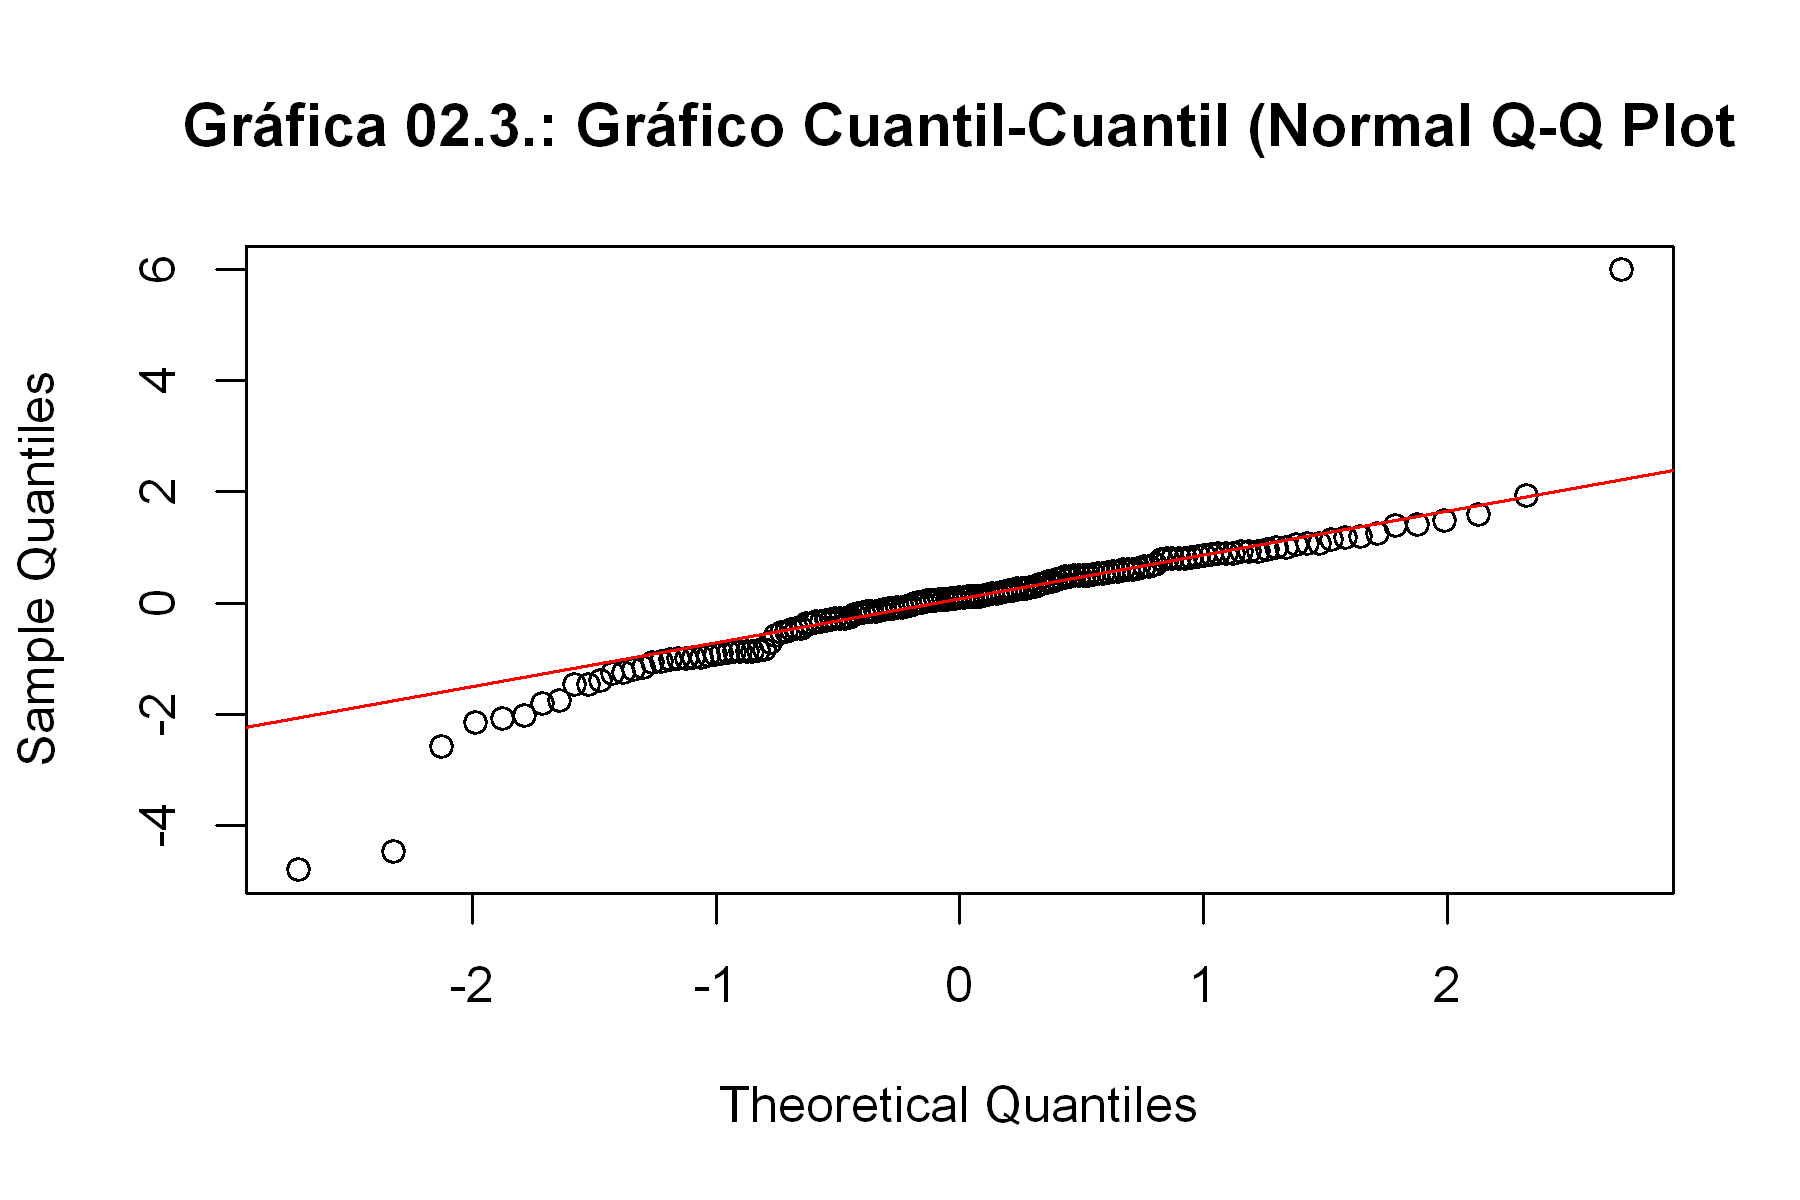

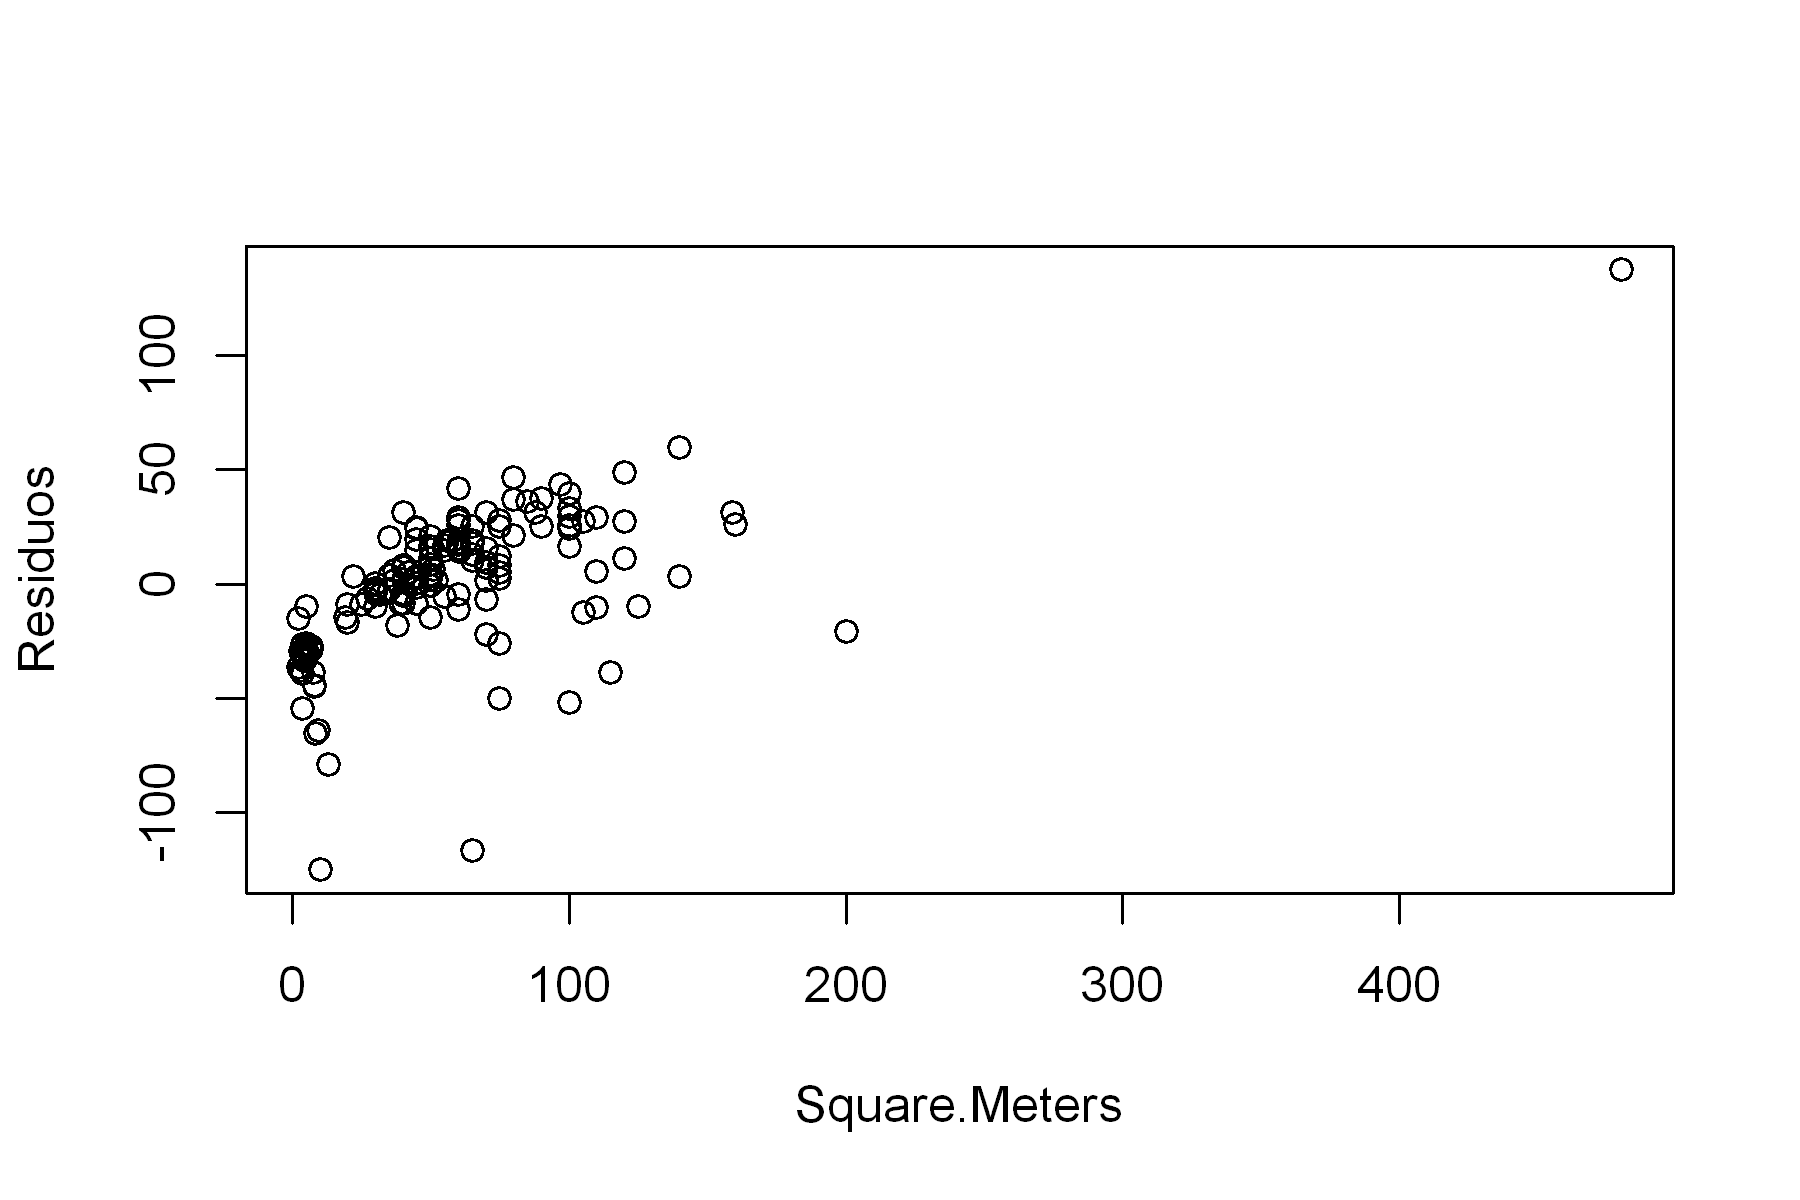

In [21]:

Residuos.M.Aplicación <- rstandard(model)
qqnorm(Residuos.M.Aplicación, main="Gráfica 02.3.: Gráfico Cuantil-Cuantil (Normal Q-Q Plot")
qqline(Residuos.M.Aplicación, col = "red")

#creamos la columna con los valores del predict
madrid.train$pred<-predict(model,madrid.train)


plot(madrid.train$Square.Meters, (madrid.train$Square.Meters-madrid.train$pred), xlab = "Square.Meters", ylab = "Residuos")


Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [22]:
madrid_pred <- subset(df_madrid, select = c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Review.Scores.Rating', 'Square.Meters'))


madrid_pred$pred_SqM <- predict(model, df_madrid)

madrid_pred$residual <- madrid_pred$Square.Meters - madrid_pred$pred_SqM
head(madrid_pred)


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Review.Scores.Rating,Square.Meters,pred_SqM,residual
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Acacias,2,0.5,0,2,30,81,NA,18.99707,NA
2,Acacias,4,1.0,1,2,59,95,NA,44.59040,NA
3,Acacias,6,1.0,2,3,50,68,NA,41.40535,NA
4,Acacias,5,2.0,2,2,120,95,NA,66.46788,NA
5,Acacias,4,1.0,2,2,74,100,NA,53.78305,NA
6,Acacias,6,2.0,3,4,100,NA,NA,NA,NA


Warning message:
"package 'glmnet' was built under R version 4.2.2"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.2"
Loaded glmnet 4.1-6



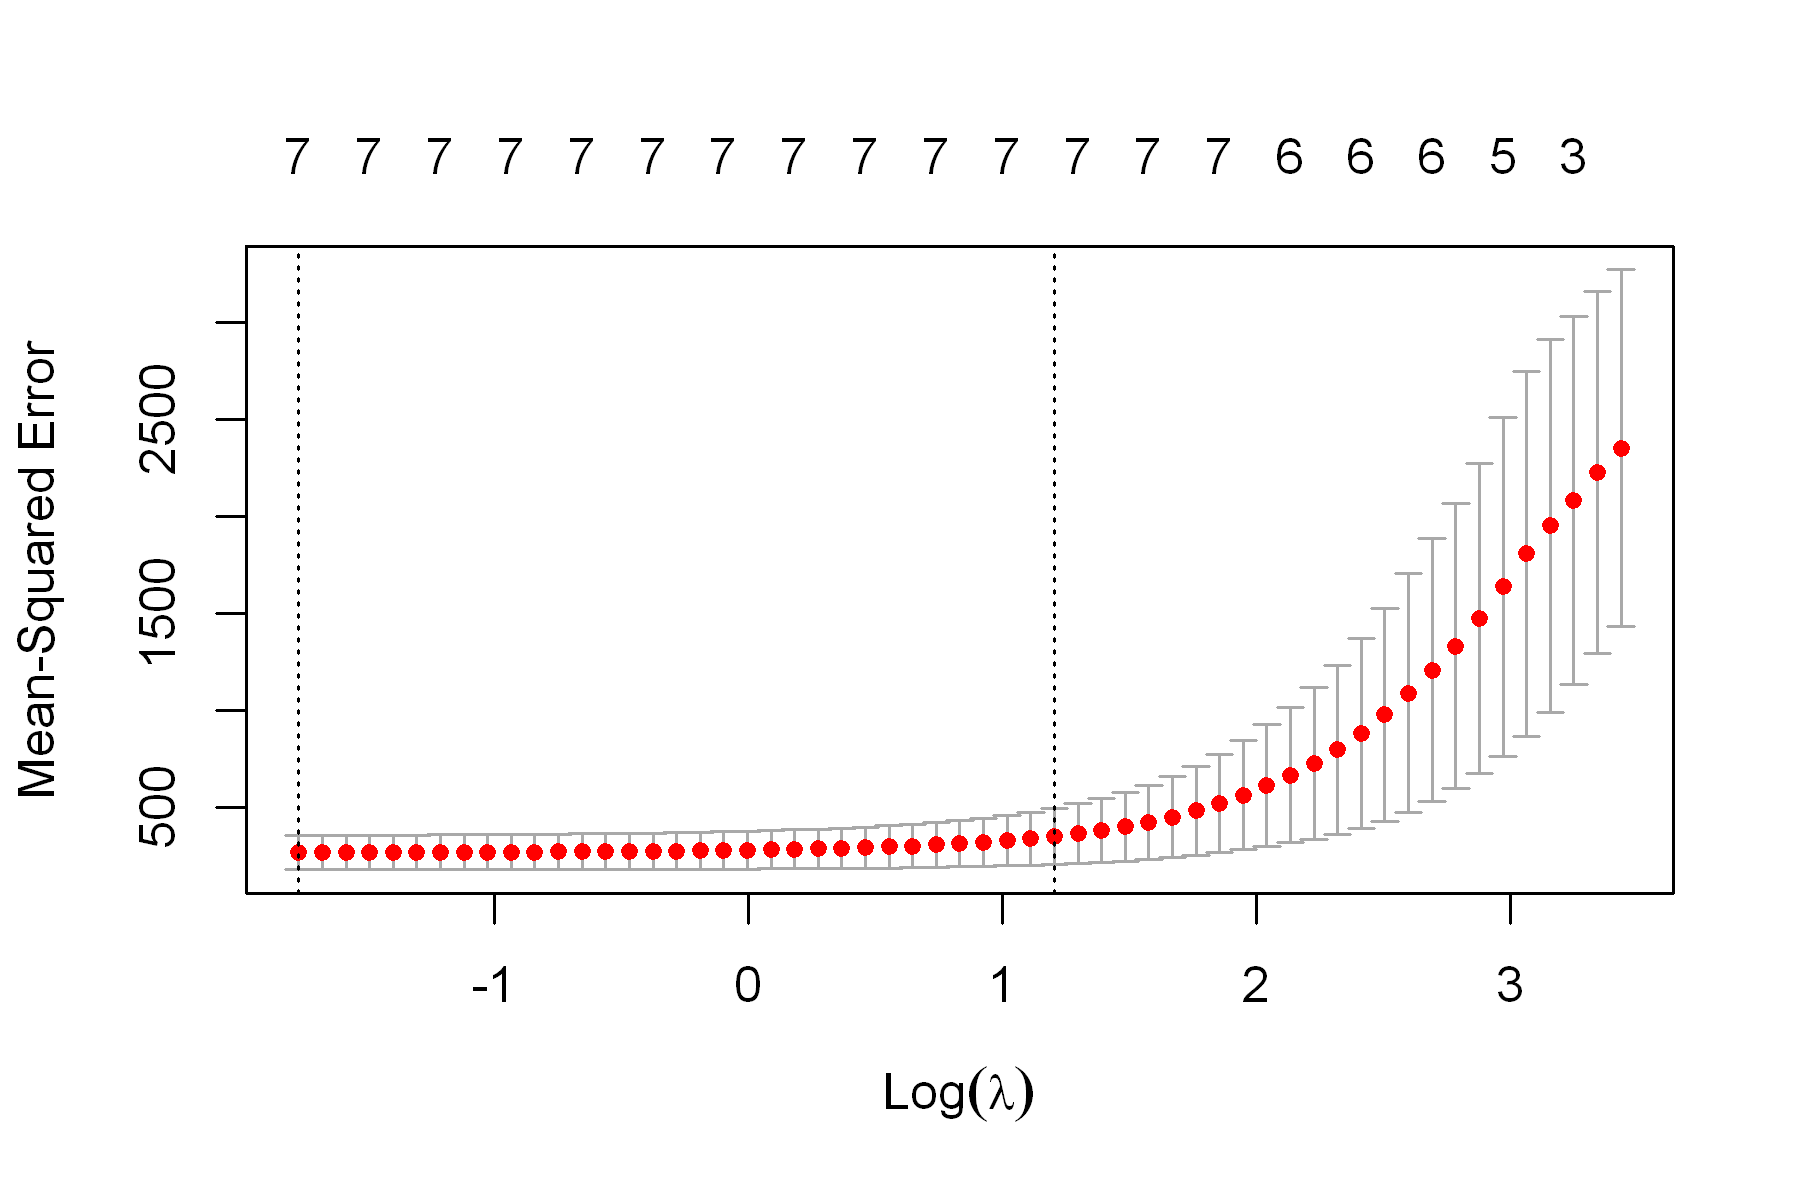

In [23]:
#impiar datos de valores nulos para poder hacer cv
limpio <- na.omit(madrid_pred)

library(glmnet)

#hago la cv
cv_mad_pred<-cv.glmnet(data.matrix(limpio[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Review.Scores.Rating', 'residual')]),data.matrix(limpio[,'Square.Meters']),nfolds=10,alpha=1, standarize=T)
plot(cv_mad_pred)

In [24]:
meters <- predict(cv_mad_pred, newx=as.matrix(data.frame(Accommodates=6, Bathrooms=1, Bedrooms=3,  Beds= 3, Price=80, Review= 80, sv=cv_mad_pred$lambda.1se)))
paste("Los metros cuadrados del piso serían: ", meters,'metros')

meters2 <-predict(cv_mad_pred, newx=as.matrix(data.frame(Accommodates=6, Bathrooms=1, Bedrooms=4,  Beds= 3, Price=80, Review= 80, sv=cv_mad_pred$lambda.1se)))
paste("Los metros cuadrados del piso2 serían: ", meters2,'metros')

paste("La diferencia de metros entre los dos con solo una habitación más es:", abs(meters - meters2),'metros')



[1] "Los metros cuadrados del piso serían:  59.0869007431734 metros"

[1] "Los metros cuadrados del piso2 serían:  64.6464413225835 metros"

[1] "La diferencia de metros entre los dos con solo una habitación más es: 5.55954057941016 metros"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [25]:
#
#todas las filas de Square.Meters con valores
df_sqm_valores <- filter(df_madrid, !is.na(df_madrid$Square.Meters))



#extraer del df los valores a sustiuir 
sustituir_sqm_pred_madrid <- filter(df_madrid, is.na(df_madrid$Square.Meters))


#sustituir los NA por el valor predicho
sustituir_sqm_pred_madrid <- predict(model, sustituir_sqm_pred_madrid)


#combinar los sustituidos con los valores reales
df_madrid_sqm_sustuidos<-rbind(sustituir_sqm_pred_madrid,df_sqm_valores)
df_madrid<- df_madrid_sqm_sustuidos


Warning message in rbind(deparse.level, ...):
"number of columns of result, 13, is not a multiple of vector length 4849 of arg 1"
Warning message in `[<-.factor`(`*tmp*`, ri, value = 39.4165515720534):
"invalid factor level, NA generated"


In [26]:
summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms         Bedrooms     
 Length:220         Min.   : 2.000   Min.   : 1.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median : 1.000   Median : 1.000  
                    Mean   : 4.575   Mean   : 1.484   Mean   : 1.874  
                    3rd Qu.: 6.000   3rd Qu.: 1.500   3rd Qu.: 2.000  
                    Max.   :44.590   Max.   :41.405   Max.   :66.468  
                                     NA's   :2        NA's   :2       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 20.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 60.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.785   Mean   : 92.57   Mean   : 2.256   Mean   : 10.94  
 3rd Qu.: 3.000   3rd Qu.: 97.25   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :53.783   

In [27]:
df_madrid

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
18.9970715565794,44.5904,41.40535,66.46788,53.78305,NA,43.26603,26.88877,57.24735,51.92326,NA,25.325546,NA
Acacias,4.0000,1.00000,1.00000,2.00000,60,2.00000,12.00000,85.00000,40.40073,-3.706203,69.955959,1
Acacias,4.0000,1.00000,1.00000,3.00000,68,2.00000,10.00000,90.00000,40.39691,-3.705202,74.972721,1
Acacias,4.0000,1.00000,1.00000,2.00000,60,2.00000,15.00000,98.00000,40.40513,-3.707726,49.981814,1
Adelfas,4.0000,2.00000,2.00000,2.00000,76,4.00000,15.00000,75.00000,40.40606,-3.668898,7.432240,1
Adelfas,6.0000,1.50000,2.00000,6.00000,60,2.00000,15.00000,94.00000,40.39912,-3.670071,69.955959,1
Almagro,4.0000,1.00000,1.00000,2.00000,75,2.00000,10.00000,92.00000,40.43825,-3.693876,49.981814,1
Almenara,4.0000,1.00000,0.00000,1.00000,52,2.00000,0.00000,53.00000,40.47226,-3.692849,40.041193,1
Almenara,4.0000,1.00000,0.00000,1.00000,52,2.00000,0.00000,72.00000,40.47221,-3.693440,44.965052,1


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [28]:

df_mad_sqm_clean  <-df_madrid[, c(
    'Accommodates',
    'Bathrooms',
    'Bedrooms',
    'Beds',
    'Price',
    'Guests.Included',
    'Extra.People',
    'Review.Scores.Rating',
    'Latitude',
    'Longitude',
    'Square.Meters'
)]

df_mad_pca<- na.omit(df_mad_sqm_clean)
head(df_mad_pca)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,4,1.0,1,2,60,2,12,85,40.40073,-3.706203,69.95596
3,4,1.0,1,3,68,2,10,90,40.39691,-3.705202,74.97272
4,4,1.0,1,2,60,2,15,98,40.40513,-3.707726,49.98181
5,4,2.0,2,2,76,4,15,75,40.40606,-3.668898,7.43224
6,6,1.5,2,6,60,2,15,94,40.39912,-3.670071,69.95596
7,4,1.0,1,2,75,2,10,92,40.43825,-3.693876,49.98181


In [29]:
##Utilizamos prcomp para calcular el pca

pmadrid<-prcomp(df_mad_pca,center = TRUE, scale = TRUE)
pmadrid

Standard deviations (1, .., p=11):
 [1] 2.1774860 1.2050588 1.0637481 0.8974535 0.8576931 0.7481093 0.7347481
 [8] 0.6182072 0.5488149 0.4836547 0.3419730

Rotation (n x k) = (11 x 11):
                            PC1          PC2         PC3         PC4
Accommodates         0.41294580 -0.075349942  0.15667657 -0.05661589
Bathrooms            0.36950053  0.157718736 -0.04958452 -0.22372767
Bedrooms             0.39577434 -0.061938499 -0.03698721 -0.12943068
Beds                 0.39905977 -0.076722168  0.03886965 -0.03369418
Price                0.31007226 -0.042405654 -0.14335204 -0.24203450
Guests.Included      0.33967709  0.075652079  0.21338419 -0.02026113
Extra.People         0.20469155 -0.265512323  0.28736442  0.82244915
Review.Scores.Rating 0.02478082 -0.181656427 -0.84526326  0.22187534
Latitude             0.04219213  0.678784496 -0.01223687  0.08750209
Longitude            0.07260713  0.622862244 -0.11315713  0.33842266
Square.Meters        0.34054233  0.001193231 -0.3066427

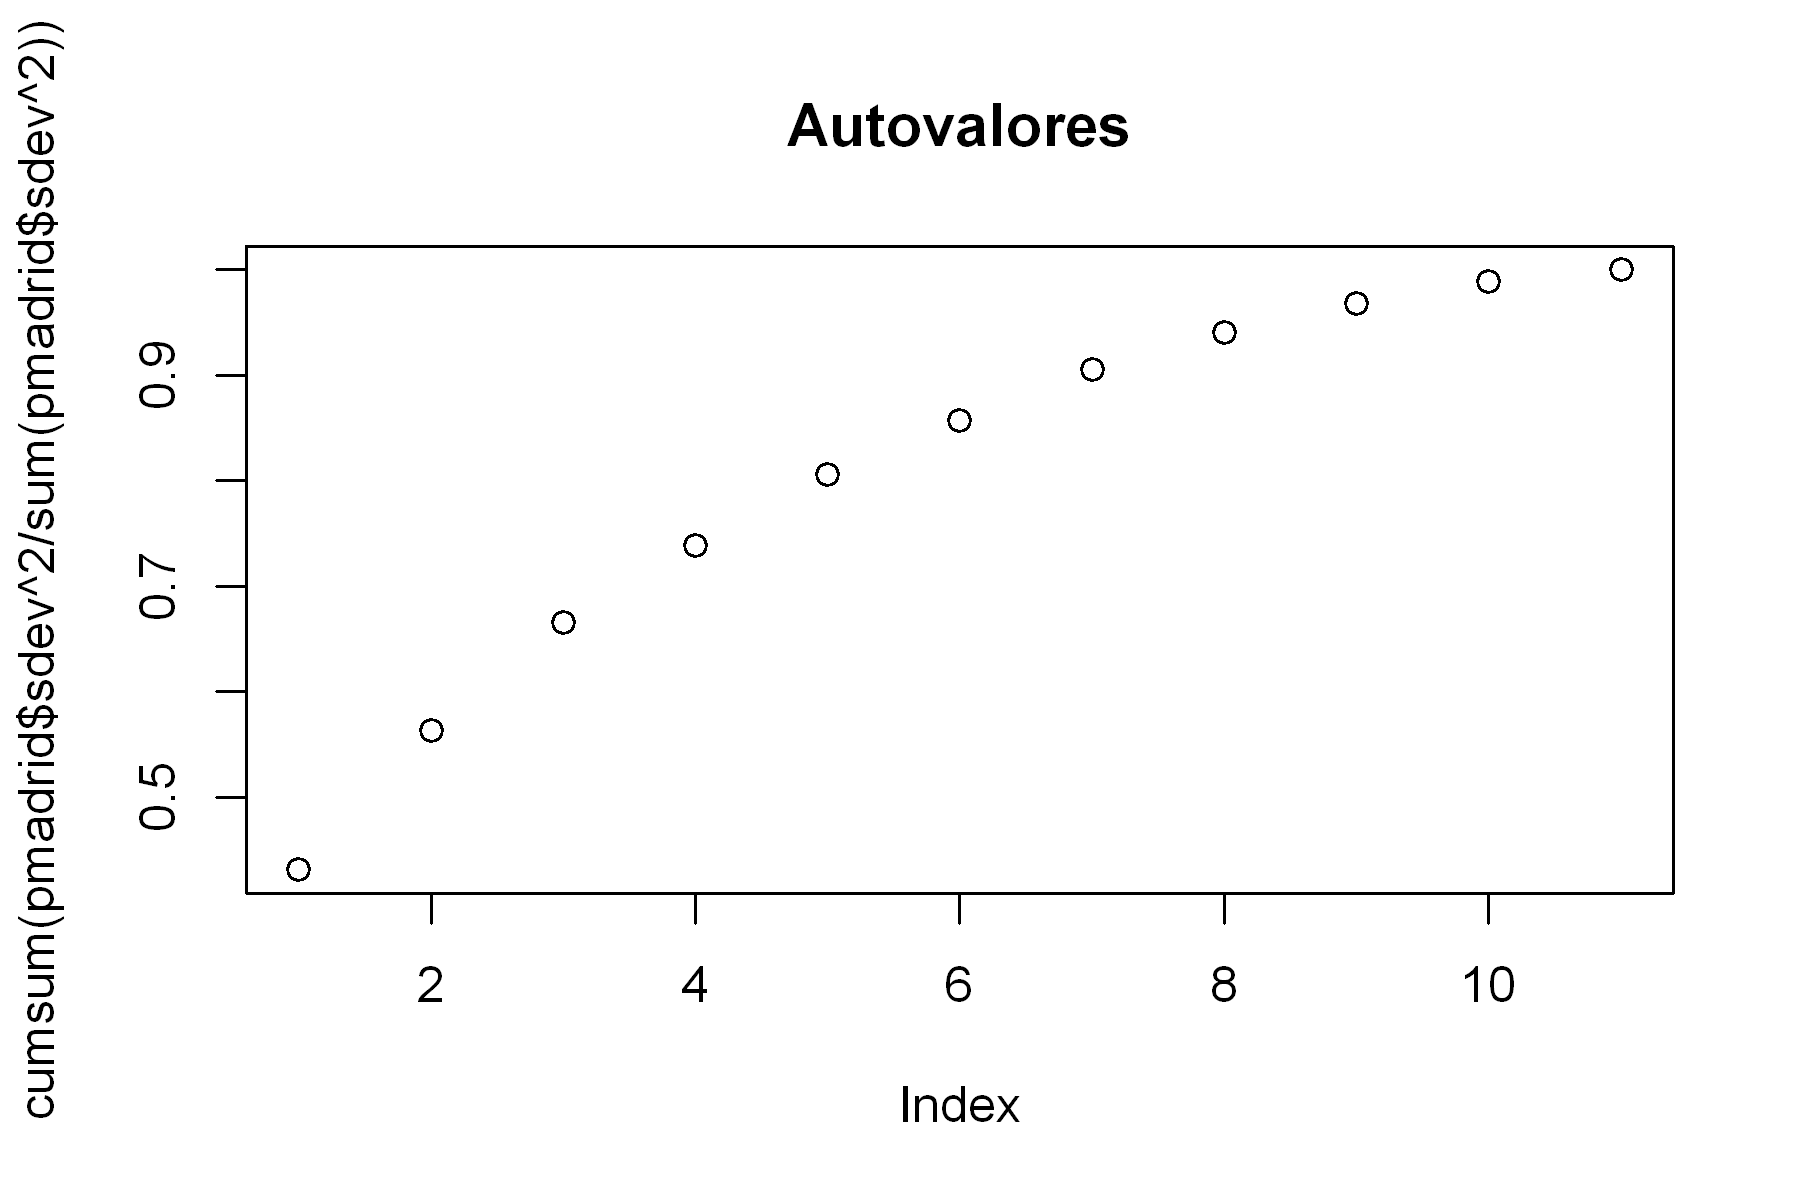

In [30]:
#pintar los autovalores 

plot(cumsum(pmadrid$sdev^2/sum(pmadrid$sdev^2)),main="Autovalores")

In [31]:
#Matrix de componentes principales

dim(df_mad_pca)

[1] 209  11

In [32]:
#nos quedamos con 4 componentes
number_of_pca_components <-4
Apc<-pmadrid$x[,1:number_of_pca_components]
dist<-rep(NA,nrow(Apc))
head(Apc)

,PC1,PC2,PC3,PC4
2,-0.7020092,-1.0295374,0.50159713,0.19289684
3,-0.4655552,-1.2407494,-0.05828618,0.09635622
4,-0.7321896,-1.2429678,-0.47442884,0.72064649
5,0.6814405,0.8280541,1.85835804,0.12158321
6,1.4265797,-0.3397729,-0.30753298,0.87648573
7,-0.6528051,0.8554064,-0.21934912,0.48396980


In [33]:
piso <- data.frame(Accommodates=6 , Bathrooms=1.0, Bedrooms=2, Beds=3, Price=60, Guests.Included=2, Extra.People=10, Review.Scores.Rating=88 , Latitude=40.40554, Longitude=-3.710429, Square.Meters= 67.43726)


predict<-matrix(predict(pmadrid, piso)[1:number_of_pca_components],nrow=1)


for (i in 1:nrow(Apc)){
    dist[i]<-sum((predict-Apc[i,])^2)
}


top_parecidos <- df_mad_pca[head(order(dist,decreasing = FALSE),6), ]
paste('El piso escogido era: ')
top_parecidos[1, ]
paste(' Los 5 más parecidos son: ')
top_parecidos[2:6, ]

[1] "El piso escogido era: "

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
99,4,1,2,3,85,3,10,94,40.40818,-3.708963,37.99733


[1] " Los 5 más parecidos son: "

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
109,4,1,2,4,70,2,15,85,40.41182,-3.709931,44.965052
111,6,1,2,1,113,2,11,89,40.41043,-3.709437,7.896755
106,4,1,2,3,65,2,12,93,40.40888,-3.713721,65.032100
68,6,1,2,4,75,2,5,90,40.41059,-3.703397,69.955959
136,6,1,2,3,59,2,15,91,40.42393,-3.709840,44.965052


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?